In [0]:
import math
import random as rnd
from itertools import product
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def graph_function(fun, x_range):
  y_eval = fun(x_range)
  plt.plot(x_range, y_eval)
  plt.show()


def graph_3dfunction(fun, x_range, y_range):
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')

  X,Y = np.meshgrid(x_range, y_range)
  z_eval = [fun(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))]
  z_eval = np.array(z_eval)
  Z = z_eval.reshape(X.shape)

  ax.set_xlabel('X axis')
  ax.set_ylabel('Y axis')
  ax.set_zlabel('Z axis')
  ax.plot_surface(X, Y, Z)

# Ejercicio 5

def f_5(x):
  return x**2 + 3*x + 5

def N_5(x):
  return [x - 1, x + 1]

def hill_climbing(f, x_0, N, MAX_IT, min_max):
  '''
    f es la función a optimizar.
    x_0 es el valor inicial.
    N es la función de vecinos.
    MAX_IT número de iteraciones máximo.
    min_max función min o max para elegir mejor vecino.
  '''
  eval_N  = [(f(x_n), x_n) for x_n in N(x_0)]
  (f_xi, x_i)= (f(x_0), x_0)
  (f_xj, x_j)  = min_max(eval_N)
  
  it = 1
  while f_xi > f_xj and it <= MAX_IT:
    print("> Iteracion %d: x_i = %d f(x_i) = %d" 
              % (it, x_i, f_xi))   
    eval_N  = [(f(x_n), x_n) for x_n in N(x_j)]
    (f_xi, x_i) = (f_xj, x_j)
    (f_xj, x_j) = min_max(eval_N)
    it += 1
  
  if (it > MAX_IT):
    print("Se alcanzó el máximo de iteraciones.")
  return x_i

**1.** Sean $f_{1}, f_{2}$: $\mathbb{R} \rightarrow \mathbb{R}$ dadas por
> $f_{1}(x) = x^{2} - 2ex + e^{2} - 2$
> $f_{2}(x) = x^{6} - 6ex^{5} + 15e^{2}x^{4}-20e^{3}x^{3} + 15e^{4}x^{2} - 6e^{5}x + e^{6} - 6$

> **(a)** Demuestre que:

>>**(a.1)** $f_{1}(x)$ es convexa.

>> Basta ver que $f_{1}^{''}(x) > 0$. Entonces:
>> $f_{1}^{'}(x) = 2x - 2e$'  $\rightarrow f_{1}^{''}(x) = 2 > 0$

>>$\therefore$ $f_{1}$ es convexa.

>>**(a.2)** $f_{2}(x)$ es convexa.

>>$f_{2}^{'}(x) = 6x^{5} - 30ex^4+60e^2x^3 - 60e^3x^2 + 30e^4x-6e^5$ 
>> $f_{2}^{''}(x) = 30x^4-120ex^3 + 180e^2x^2 -120e^3x + 30e^4$

> > Supongamos que $30x^4+180e^2x^2+30e^4 \leq 120ex^3 + 120e^3x$

> > **Si x $\leq$ 0** Entonces $a = 30x^4+180e^2x^2+30e^4 > 0$ pues *x* es modificado por potencias pares y $30e^4 > 0$. Por otro lado, $b= 120ex^3 + 120e^3x \leq 0$ pues $x \leq 0$ y permanece negativo en potencia impar. Entonces $b \leq a$ **!** Contradicción pues suponemos que $a < b$

> > **Si x > 0** 

> > En este caso podemos ver que el lado izquierdo de la seigualdad crece más rápido que el lado derecho, por lo que $30x^4+180e^2x^2+30e^4  > 120ex^3 + 120e^3x$ **!** Contradicción pues estamos suponiendo justo lo contrario

> >$\therefore 120ex^3 + 120e^3x \leq 30x^4+180e^2x^2+30e^4$ $\leftrightarrow  30x^4+180e^2x^2+30e^4 - (120ex^3 + 120e^3x) > 0 \leftrightarrow f_2(x) > 0$ 

> > $\therefore f_{2}(x)$ es convexa.

> **(a.2) ** Utilice el algoritmo del descenso por gradiente implementado para minimizarlas. Use $x_{0} = 0$ como punto inicial y $\alpha$ arbitrario. ¿Qué valores de $\alpha$ hacen más eficiente el algoritmo para cada función?

In [0]:
def f1(x):
  return x**2 - 2*math.exp(1)*x + math.exp(2) - 2

def df1(x):
  return 2*x - 2*math.exp(1)

def f2(x):
  left =  x**6 - 6*math.exp(1)*x**5 + 15*math.exp(2)*x**4 - 20*math.exp(3)*x**3
  right = 15*math.exp(4)*x**2 - 6*math.exp(5)*x + math.exp(6) - 6
  return left + right
  
def df2(x):
  left = 6*x**5 - 30*math.exp(1)*x**4 + 60*math.exp(2)*x**3
  right = -60*math.exp(3)*x**2 + 30*math.exp(4)*x - 6*math.exp(5)
  return left + right

def max_descent(gradient_f, x_0, step):
  precision = 0.0000001
  max_it = 100
  x_i = x_0
  gx_i = gradient_f(x_i)
  while abs(gx_i) > precision and max_it > 0:
    p_i = -1 * gx_i
    x_next = x_i + step * p_i
    gx_i = gradient_f(x_next)
    x_i = x_next
    max_it -= 1
     
  return x_i


def alpha(f, df, x_0, num):
  bound = 0.5
  delta = 0.5
  it = 2
  while it > 0:
    steps = np.linspace(bound - delta, bound + delta, num)
    best_x = max_descent(df, x_0, steps[0])
    best_a = steps[0]
    for i in range(1, len(steps)):
      x = max_descent(df, x_0, steps[i])
      if abs(df(best_x)) > abs(df(x)):
        best_x = x
        best_a = steps[i]
    bound = best_a
    delta = 0.001
    it -= 1 
  
  return (best_x, best_a)


> >  - **Para $f_1$**
> > Tenemos que mientras $a \to 0.5$ entonces nos acercamos tanto como queramos al óptimo de $f_1$



In [0]:
(x, a) = alpha(f1, df1, 0, 10000)
print("Mejor a = %f" % a)
print("Obtenemos x = %f donde f(x) = %f y grad_f(x) = %f" %
          (x, f1(x), df1(x)))

Mejor a = 0.500000
Obtenemos x = 2.718282 donde f(x) = -2.000000 y grad_f(x) = -0.000000


> >  - **Para $f_2$**
> > Tenemos que mientras $a \to 0.5$ entonces nos acercamos tanto como queramos al óptimo de $f_1$


In [0]:
'''
  Genera overflow :( pero sí regresa alpha.
'''
(x, a) = alpha(f2, df2, 0, 1000)
print("Mejor a = %f" % a)
print("Obtenemos x = %f donde f(x) = %f y grad_f(x) = %f" %
          (x, f1(x), df1(x)))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in double_scalars
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars


Mejor a = 0.003054
Obtenemos x = 2.719571 donde f(x) = -1.999998 y grad_f(x) = 0.002578


**2.** Lea el las fotocopias dadas en clase y contesta las siguientes preguntas:
> **(a)** Mencione al menos 2 razones por las cuáles un problema del mundo real puede no ser resuelto fácilmente. No usar ninguna de las razones enumeradas en la página 11 del capítulo proporcionado.

> > **(a. 1)**

> > > Si el problema va cambiando durante el tiempo entonces esto complica encontrar una solución y también su modelado en términos matemáticos. 

> > **(a.2)**

> > > Influye también el poder de cómputo, la cual se relaciona mucho con el tamaño del espacio de búsqueda. Por ejemplo, los comienzos de investigación sobre redes neuronales artificiales se dieron en la segunda mitad del sigo $XIX$, sin embargo su uso se dio hace algunos años debido al aumento del poder de cómputo disponible.

> **(b)** Supongamos que la optimización de una función $f$ requiere de 10 variables de decisión $x_{i}(i=1,\dots ,10)$ cada una de las cuales está en el dominio $-50 \leq x_{i} \leq 50$.

>> **(b.1)** Si $x_{i}$ sólo puede tomar valores enteros, ¿cuál es el tamaño del espacio de búsqueda del problema?
>>> Cómo tenemos 10 variables y cada una puede tomar 100 posibles valores distintos sin ninguna otra restricción, entonces tenemos $100_{1} \times \dots \times 100_{10}$ = $100^{10}$ = $10^{{2}^{10}}$ = $10^{20}$

>>> $\therefore$ El tamaño de búsqueda del espacio es $10^{20}$

>> **(b.2)** Si $x_{i}$ puede tomar valores reales y se usa una precisión de ocho lugares decimales, ¿cuál es el tamño del espacio de búsqueda del problema?
>>> Cada decimal $d$ cumple que $0 \leq d \leq 9$, es decir, cada decimal puede tomar 10 valores distintos, teniendo $10_{1} \times \dots \times 10_{8} = 10^{8}$  esto respresenta la cantidad de todos los decimales distintos de longitud 8.

>>> Cómo tenemos 100 valores distintos para cada entero $x_{i}$ entonces tendremos $(100\times 10^{8})_{1} \times \dots \times (100\times 10^{8})_{10}$ = $10^{10}_{1} \times \dots \times 10^{10}_{10}$ = $10^{{10}^{10}}$ = $10^{100}$

>>> $\therefore$ El tamaño del espacio de búsqueda es $10^{100}$



**3.** Investiga a qué se refieron los términos: $exploración$ y $explotación$ dentro de las fases de un algoritmo evolutivo.

> **Exploración:**  Generación de nuevos individuos en regiones aún no probadas del espacio de búsqueda.

> **Explotación:** Concentración de la búsqueda dentro de una vecindad de la que se sabe existen buenas soluciones.

> **Fuente:** *A.E.Eiben. (2003). Introduction to Evolutionary Computing. Nueva York: Springer. 1era Edición. Página: 29*

**4.** ¿Consideraría el algoritmo de Hill-Climbing, un algoritmo voraz $(greedy algorithm)$?

> Considero que sí es un algoritmo voraz pues en cada iteración siempre escoge la mejor solución posible a la que tiene alcance en ese momento. En el caso de Hill-Climbing, siempre toma la solución con mejor costo de acuerdo a la vecindad que pueda ver. En los algoritmos *greedy* suele suceder que esta técnica lleva a óptimos locales, lo cual sucede también con el algoritmo *Hill-Climbing*. 


**5.** Considera la función $f(x)= x^2 + 3x + 5$ definida sobre $\mathbb{Z}$ en el intervalo $[-20, 20]$. Vamos a usar el algoritmo Hill-Climbing para encontrar el valor de *x* que minimiza la función en ese intervalo.

> **(a)** Grafica la función.

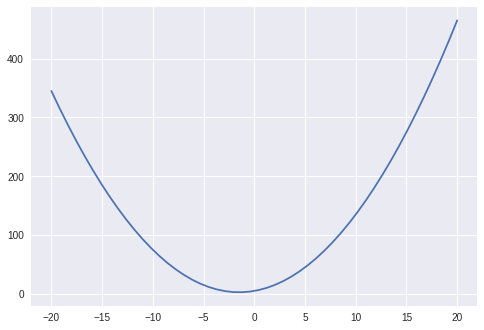

In [0]:

x_range = np.linspace(-20, 20)
graph_function(f_5, x_range)

> **(b)** Considera el vecindario definido por $N(x) = \{x + 1, x - 1\}$ $\forall x \in [-19,19]$. Camos a usar el algoritmo Hill-Climbing para encontrar el valor de *x* que minimiza la función en ese intervalo.

In [0]:
MAX_IT = 100
x_0 = 6
x = hill_climbing(f_5, x_0, N_5, MAX_IT, min)
print("Se encontró el óptimo en x = %d, donde f(x) = %d" % (x, f_5(x)))


> Iteracion 1: x_i = 6 f(x_i) = 59
> Iteracion 2: x_i = 5 f(x_i) = 45
> Iteracion 3: x_i = 4 f(x_i) = 33
> Iteracion 4: x_i = 3 f(x_i) = 23
> Iteracion 5: x_i = 2 f(x_i) = 15
> Iteracion 6: x_i = 1 f(x_i) = 9
> Iteracion 7: x_i = 0 f(x_i) = 5
Se encontró el óptimo en x = -1, donde f(x) = 3


**6.** Implementar en python el algoritmo de *búsqueda tabú* con una longitud máxima para la lista tabú y un criterio de paro arbitrarios para resolver el siguiente problema.

In [0]:
# Ejercicio 6: Búsqueda Tabú
def search_space():
  s_x = [i/10 for i in range(151)]
  s_x.extend([i/(10*math.sqrt(2)) for i in range(151)])
  S = list(product(s_x, s_x))
  return S

def phi(theta):
  pi_cuartos = math.radians(math.pi / 4)
  if theta >= 0 and theta <= pi_cuartos:
    return theta * 2
  if theta > pi_cuartos and theta <= math.radians(3*math.pi/4):
    left = 3 * math.pi / 10
    right = 4 * theta / 5
    return left + right
  return theta
  
def ang(x, y):
  m_pi = math.radians(math.pi)
  if x == 0 and y == 0:
    return 0
  if x > 0 and y >= 0:
    return math.atan(y/x)
  if x == 0 and y > 0:
    return m_pi / 2
  if x < 0 and y >= 0:
    return m_pi + math.atan(y/x)
  if x < 0 and y <= 0:
    return m_pi + math.atan(y/x)
  if x == 0 and y < 0:
    return 3 * m_pi / 2
  if x > 0 and y <= 0:
    return 2 * m_pi + math.atan(y/x)

def F(x, y):
  fst = (x**2 + y**2)*(math.cos(phi(ang(x,y)))**2)
  snd = 5*(x**2 + y**2)*(math.sin(phi(ang(x,y)))**2)
  trd = (1/4) * math.sin(phi(ang(x,y)))**3 * (x**2 + y**2)**(3/2)
  frd = (1/16)*(x**2 + y**2)**2 * math.sin(phi(ang(x,y)))**4
  return fst - snd - trd + frd

  
def taboo_search(f, x_0, S, N, taboo_size, max_it):
  taboo_list = []
  t = 1
  while t <= max_it:
    neighbors = set(N(x_0[0], x_0[1], S)) - set(taboo_list)
    (f_xm, x_m) = min([(f(x[0], x[1]), x) for x in neighbors])
    taboo_list.append(x_m)
    if len(taboo_list) > taboo_size:
      taboo_list.pop(0)
    x_0 = x_m
    t += 1
  return x_0

def compara_listas(N, x_0, max_taboo, max_it):
  S = search_space()
  (x,y) = taboo_search(F, x_0, S, N, 1, max_it)
  F_evals = [F(x,y)]
  for tl_size in range(2, max_taboo):
    (u,v) = taboo_search(F, x_0, S, N, tl_size, max_it)
    f_uv = F(u,v)
    F_evals.append(f_uv)
    if f_uv > F(x,y):
      (x,y) = (u,v)

  print("La primer mejor posición fue F(%f,%f) = %f" % (x,y,F(x,y)))
  print("Gráfica con eje_X = Tamaño de la lista taboo; eje_Y = F(u,v)")
  plt.plot([i for i in range(1,max_taboo)], F_evals, 'go-', label='line 1', linewidth=2)
  plt.show()
  

> **(a)** Usando vecindad $V_{1}$


F(0.070711,7.990307) = -191.993780


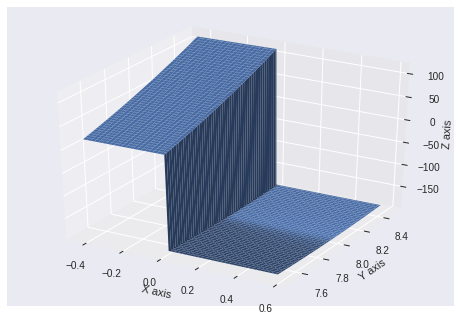

In [0]:

def V_1(x, y, S):
  V = []
  for (s_x, s_y) in S:
    if abs(x - s_x) + abs(y - s_y) <= 1:
      V.append((s_x, s_y))
  return V
  
S = search_space()
x_0 = (0,0)
taboo_size = 8
(x,y) = taboo_search(F, x_0, S, V_1, 8, 100)

print("F(%f,%f) = %f" % (x, y, F(x,y)))

x_range = np.linspace(x-.5, x+.5, 100)
y_range = np.linspace(y-.5, y+.5, 100)
graph_3dfunction(F, x_range, y_range)


La primer mejor posición fue F(0.141421,7.919596) = -191.896864
Gráfica con eje_X = Tamaño de la lista taboo; eje_Y = F(u,v)


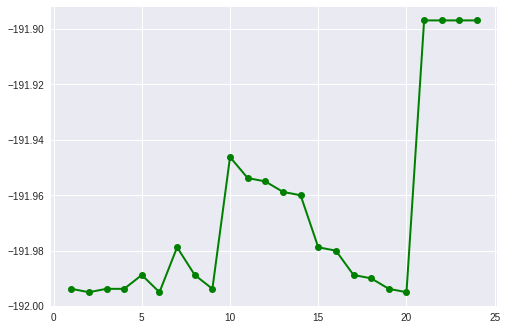

In [0]:
# Comparación de tamaño de listas usando V1.
# Se tarda un rato.
taboo_size = 25
max_it = 30
compara_listas(V_1, (0,0), taboo_size, max_it)

> **(b)** Usando vecindad $V_{\infty}$

F(0.100000,8.000000) = -191.990000


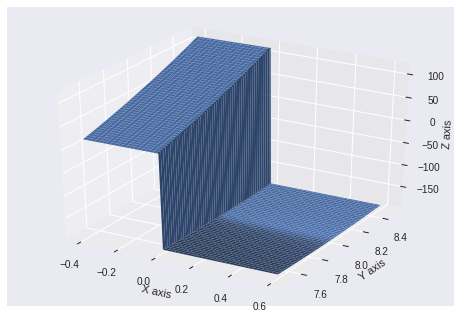

In [0]:
def V_inf(x, y, S):
  V = []
  for (s_x, s_y) in S:
    if max(abs(x - s_x), abs(y - s_y)) <= 1:
      V.append((s_x, s_y))
  return V 

S = search_space()
taboo_size = 8
x_0 = (0,0)
(x,y) = taboo_search(F, x_0, S, V_inf, taboo_size, 100)

print("F(%f,%f) = %f" % (x, y, F(x,y)))

x_range = np.linspace(x-.5, x+.5, 100)
y_range = np.linspace(y-.5, y+.5, 100)
graph_3dfunction(F, x_range, y_range)


La primer mejor posición fue F(0.200000,7.919596) = -191.876864
Gráfica con eje_X = Tamaño de la lista taboo; eje_Y = F(u,v)


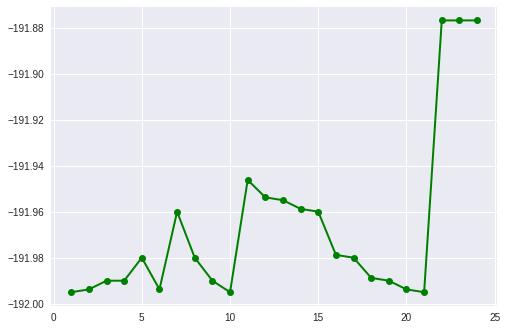

In [0]:
# Comparación de tamaño de listas usando V_inf.
# Se tarda un rato.
taboo_size = 25
max_it = 30
compara_listas(V_inf, (0,0), taboo_size, max_it)

**Extra** Sea $X$ un arreglo de n elementos con un orden definido entre ellos, $f$ una función tal que $f(X)$ regressa el número de elementos desordenados de $X$ y sea $V_{d}(X)$ la vecinadad de tamaño d del arreglo x, donde una vecindad de tamaño $d=1$ se define como los arreglos obtenidos a partir de una permutación entre dos elementos sobre el arreglo $X$

In [0]:
def f_extra(P):
  count = 0
  for i in range(len(P)):
    if P[i] != i:
      count += 1
  return count

def extra_taboo(F, p_0, N, d, taboo_size, max_it):
  taboo_list = []
  it = 1
  while it <= max_it:
    neighbors = N(p_0, d)
    (f_pm, p_m) = min([(F(n), n) for n in neighbors])
    taboo_list.append(p_0)
    if (len(taboo_list) > taboo_size):
      taboo_list.pop(0)
    p_0 = p_m
    it += 1

  return p_0


def V_d(p_0, d):
  length = len(p_0)
  perms = perm_pairs(p_0)
  d -= 1
  while d > 0:
    for p in perms:
      i = rnd.randint(0, length - 1)
      j = rnd.randint(0, length - 1)
      aux = p[i]
      p[i] = p[j]
      p[j] = aux
    d -= 1
  return perms
  
def perm_pairs(arr):
  perms = []
  for i in range(len(arr)):
    for j in range(i + 1, len(arr)):
      p_m  = arr[:]
      p_m[i] = arr[j]
      p_m[j] = arr[i]
      perms.append(p_m)
  return perms
  
X = np.array([i for i in range(150)])
p_0 = list(np.random.permutation(X))

max_it = 200
d = 5
taboo_size = 20
p_f = extra_taboo(f_extra, p_0, V_d, d, taboo_size , max_it)

f_p0 = f_extra(p_0)
f_pf = f_extra(p_f)
print("Fitness inicial f(p_0) = %d" % f_extra(p_0))
print("Fitness final f(p_f) = %d" % f_extra(p_f))
print("Mejora: %d - %d = %d" % (f_p0, f_pf, f_p0 - f_pf))



EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
EEEEntra
E

KeyboardInterrupt: ignored

**Comparación de vecindades y tamaños de lista tabu.**


Tomará un rato en terminar (< 5min)
Vecindades: [1, 2, 5]
Longitud de la lista tabu: i in [0, ...,  10 - 1]
Condición de paro en cada ejecución: 40 iteraciones
Fitness de la permutación inicial F(p_0) = 148


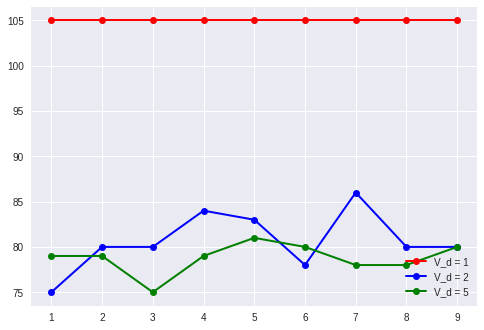

EjeX = Tamaño de lista tabú. EjeY = Fitness de la mejor permutación


In [0]:
def iterar_listas(F, N, D, x_0, max_taboo, max_it):
  F_evals = []
  for i in range(len(D)):
    d = D[i]
    p_0 = extra_taboo(F, x_0, N, d, 1, max_it)
    F_evals.append([F(p_0)])

    for tl_size in range(2, max_taboo):
      p_m = extra_taboo(F, x_0, N, d, tl_size, max_it)
      f_pm = F(p_m)
      F_evals[i].append(f_pm)
     
  for evals in F_evals:
    plt.plot([i for i in range(1,max_taboo)], evals, 'go-', label='line 1', linewidth=2)
  
  plt.gca().get_lines()[0].set_color("red")
  plt.gca().get_lines()[1].set_color("blue")  
  plt.legend([str("V_d = %d" % D[0]), str("V_d = %d" % D[1]), str("V_d = %d" % D[2])], loc='lower right')
  plt.show()

p_0 = list(np.random.permutation(X))
max_taboo = 10
max_it = 40
D = [1,2,5]
print("Tomará un rato en terminar (< 5min)")
print("Vecindades: %s" % str(D))
print("Longitud de la lista tabu: i in [0, ..., % d - 1]" % max_taboo)
print("Condición de paro en cada ejecución: %d iteraciones" % max_it)
print("Fitness de la permutación inicial F(p_0) = %d" % f_extra(p_0))
iterar_listas(f_extra, V_d, D, p_0, max_taboo, max_it)
print("EjeX = Tamaño de lista tabú. EjeY = Fitness de la mejor permutación")
